In [84]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [62]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout




In [63]:
IMG_SIZE = 150
BATCH_SIZE = 64



In [65]:
print(train_data.class_names)

['Cat', 'Dog']


In [66]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset',
validation_split = 0.2,
subset="training",
seed=123,
image_size=(IMG_SIZE, IMG_SIZE), 
batch_size=BATCH_SIZE
)

val_data=tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset',
validation_split=0.2,
subset="validation",
seed=123,
image_size=(IMG_SIZE, IMG_SIZE), 
batch_size=BATCH_SIZE
)

Found 9989 files belonging to 2 classes.
Using 7992 files for training.
Found 9989 files belonging to 2 classes.
Using 1997 files for validation.


In [67]:
normalization_layer = layers.Rescaling(1./255)

train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(tf.data.AUTOTUNE)

In [68]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [69]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',           
    metrics=['accuracy']
    )

In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

In [70]:
#CHECK FOLDER CONTENT
import os

dataset_path = r"C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset"

for folder in ["cat","dog"]:
    folder_path = os.path.join(dataset_path, folder)
    files = os.listdir(folder_path)
    print(folder, len(files))


cat 4996
dog 4993


In [71]:
#REMOVE NON-IMAGE FILES
for folder in ["cat","dog"]:
    folder_path = os.path.join(dataset_path, folder)
    for f in os.listdir(folder_path):
        if not f.lower().endswith((".jpg",".jpeg",".png")):
            print("Removing", f)
            os.remove(os.path.join(folder_path,f))


In [72]:
from PIL import Image
import os

# Set your dataset path
dataset_path = r"C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset"

# Subfolders
classes = ["cat", "dog"]

print("Checking for corrupted images...")

for cls in classes:
    folder_path = os.path.join(dataset_path, cls)
    corrupted_files = []
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # Only check image files
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img = Image.open(file_path)
                img.verify()  # Verify image
            except Exception as e:
                corrupted_files.append(filename)
    
    if corrupted_files:
        print(f"\nCorrupted images in '{cls}' folder:")
        for f in corrupted_files:
            print(" -", f)
    else:
        print(f"\nNo corrupted images found in '{cls}' folder.")

print("\nCheck complete!")


Checking for corrupted images...

No corrupted images found in 'cat' folder.

No corrupted images found in 'dog' folder.

Check complete!


In [73]:
#CHECK AND CONVERT IMAGES TO JPG
from PIL import Image
import os

dataset_path = r"C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset"
classes = ["cat","dog"]

for cls in classes:
    folder_path = os.path.join(dataset_path, cls)
    for filename in os.listdir(folder_path):
        if not filename.lower().endswith(".jpg"):
            try:
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path).convert("RGB")
                new_path = os.path.splitext(img_path)[0] + ".jpg"
                img.save(new_path)
            except:
                print("Failed to convert:", filename)


In [74]:
#RETRY LOADING DATA AFTER CLEANUP
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)


Found 9989 files belonging to 2 classes.
Using 7992 files for training.


In [75]:
#CLEAN CORRUPTED AND MISFORMATTED IMAGES AND MAKE CHANGE IN ACTUAL DATASET
from PIL import Image
import os

# Path to your dataset
dataset_path = r"C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset"
classes = ["cat", "dog"]

# Minimum and maximum allowed image size
IMG_SIZE = 150  # we want images resized to 150x150

# List to store deleted files
deleted_files = []

print("Starting dataset cleanup...")

for cls in classes:
    folder_path = os.path.join(dataset_path, cls)
    
    # Check if folder is empty
    if not os.listdir(folder_path):
        print(f"Folder '{cls}' is empty! Nothing to delete, skipping...")
        continue
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        delete_flag = False  # mark files for deletion
        
        # 1️⃣ Check file extension
        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            print(f"Unsupported format: {filename}")
            delete_flag = True
        
        else:
            try:
                # Open image
                img = Image.open(file_path)
                
                # 2️⃣ Check size
                if img.size != (IMG_SIZE, IMG_SIZE):
                    print(f"Image size not 150x150: {filename} → {img.size}")
                    delete_flag = True
                
                # 3️⃣ Check if image can be loaded (detects truncated images)
                img.load()
                
            except Exception as e:
                print(f"Cannot open image (corrupted?): {filename}")
                delete_flag = True
        
        # Delete the file if flagged
        if delete_flag:
            os.remove(file_path)
            deleted_files.append(file_path)

print("\nCleanup complete!")
print(f"Total deleted files: {len(deleted_files)}")
if deleted_files:
    print("Deleted files:")
    for f in deleted_files:
        print(" -", f)


Starting dataset cleanup...

Cleanup complete!
Total deleted files: 0


In [76]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VINAYAK INNOVATIONS\Desktop\cvdc\Dataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)


Found 9989 files belonging to 2 classes.
Using 7992 files for training.


In [77]:
history=model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 132s 519ms/step - accuracy: 0.5393 - loss: 1.5868 - val_accuracy: 0.5653 - val_loss: 0.6923
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 128s 511ms/step - accuracy: 0.6040 - loss: 0.6593 - val_accuracy: 0.5794 - val_loss: 0.6745
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 129s 515ms/step - accuracy: 0.6079 - loss: 0.6633 - val_accuracy: 0.5759 - val_loss: 0.6926
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 131s 525ms/step - accuracy: 0.6654 - loss: 0.5970 - val_accuracy: 0.5618 - val_loss: 0.7004
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 132s 527ms/step - accuracy: 0.7236 - loss: 0.5267 - val_accuracy: 0.6395 - val_loss: 0.7002
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 127s 509ms/step - accuracy: 0.7778 - loss: 0.4516 - val_accuracy: 0.6219 - val_loss: 0.7389
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 128s 510ms/step - accuracy: 0.8302 - loss: 0.3763 - val_accuracy: 0.6400 - val_loss: 0.7539
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 123s 492ms/step - accuracy: 0.8579 -

In [85]:
model=tf.keras.models.load_model("cat_dog_classifier_model.h5")

In [86]:
model.save("cat_dog_classifier_model.h5")

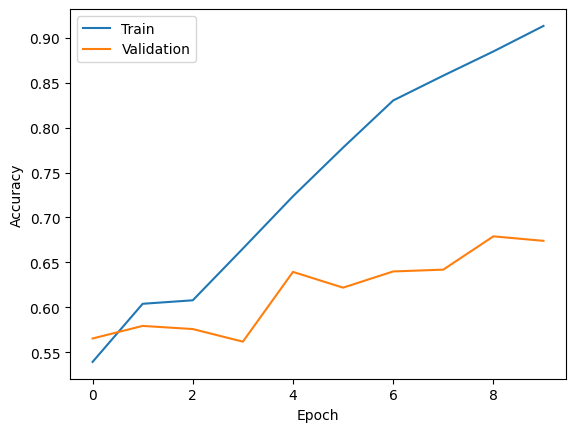

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train", "Validation"])
plt.show()

In [89]:
model=tf.keras.models.load_model("cat_dog_classifier_model.h5")

In [90]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

train_data = train_data.map(lambda x, y: (data_augmentation(x), y))


In [91]:
img = tf.keras.preprocessing.image.load_img(
    "catu.jpg",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb"
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

print("Raw prediction:", prediction[0][0])

class_names = ["cat", "dog"]

print("Final class:", class_names[int(prediction[0][0] > 0.5)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Raw prediction: 0.11139046
Final class: cat
